In [1]:
import pandas as pd
import json
import requests
import datetime
from pprint import pprint
from config import census_api_key
from census import Census
import scipy.stats as st
import matplotlib.pyplot as plt
import numpy

In [2]:
c = Census(
    census_api_key,
    year = 2017
)

In [3]:
census_data = c.acs5.get(
    (
        "NAME",
        "B19013_001E",
        "B01003_001E",
        "B01002_001E",
        "B19301_001E",
        "B17001_002E",
        "B23025_005E",
        "B23025_002E"
    ),
    {'for': 'zip code tabulation area:*'}
)

# Convert to DataFrame
census_df = pd.DataFrame(census_data)

# Column renaming
census_df = census_df.rename(
    columns = {
        "B01003_001E": "Population",
        "B01002_001E": "Median Age",
        "B19013_001E": "Household Income",
        "B19301_001E": "Per Capita Income",
        "B17001_002E": "Poverty Count",
        "B23025_005E": 'Unemployed',
        "B23025_002E": 'Employed',
        "NAME": "Name",
        "zip code tabulation area": "Zipcode"
    }
)

# Add a Poverty Rate column (Poverty Count / Population)
census_df["Poverty Rate"] = 100 * census_df["Poverty Count"].astype(int) / census_df["Population"].astype(int)

# Configure the final DataFrame
census_df = census_df[
    [
        "Zipcode",
        "Population",
        "Median Age",
        'Unemployed',
        'Employed',
        "Household Income",
        "Per Capita Income",
        "Poverty Count",
        "Poverty Rate",
        
    ]
]

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(census_df)}")
census_df.head()

Number of rows in the DataFrame: 33120


,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
0,00601,17599.0,38.9,2454.0,5953.0,11757.0,7041.0,11282.0,64.105915
1,00602,39209.0,40.9,2538.0,14390.0,16190.0,8978.0,20428.0,52.100283
2,00603,50135.0,40.4,3588.0,16044.0,16645.0,10897.0,25176.0,50.216416
3,00606,6304.0,42.8,204.0,1707.0,13387.0,5960.0,4092.0,64.911168
4,00610,27590.0,41.4,1474.0,10048.0,18741.0,9266.0,12553.0,45.498369


In [4]:
poverty_df = census_df.sort_values(by='Poverty Count', ascending=False)
poverty_df.head()

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
30019,90011,108051.0,28.0,3954.0,48603.0,33824.0,10887.0,38839.0,35.945063
2645,10456,94667.0,30.5,5329.0,39388.0,26724.0,14424.0,37540.0,39.654790
27256,78521,92975.0,28.8,3280.0,34799.0,28935.0,12173.0,34978.0,37.620866
56,00725,82822.0,40.4,5766.0,32983.0,20374.0,12575.0,34629.0,41.811354
2642,10453,82232.0,30.1,4555.0,36069.0,24421.0,13386.0,33803.0,41.106868


In [5]:
desired_zip_codes = ['44145', '75206', '55792', '98101', '44312', '79735']

filtered_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

filtered_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
25974,75206,38762.0,31.2,922.0,27456.0,63392.0,49708.0,5467.0,14.104019
14314,44312,31074.0,43.2,1165.0,16410.0,47393.0,24735.0,3098.0,9.969750
32338,98101,12408.0,38.9,419.0,8433.0,68750.0,70914.0,2061.0,16.610251
18733,55792,9795.0,42.7,261.0,4604.0,39080.0,27156.0,2054.0,20.969883
14256,44145,32387.0,46.7,628.0,17025.0,81966.0,51434.0,1716.0,5.298422
27714,79735,13383.0,36.4,194.0,5076.0,46445.0,18091.0,1352.0,10.102369


In [6]:
desired_zip_codes = ['98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108', '98109', '98110', '98111', '98112', '98113', '98114', '98115', '98116', '98117', '98118', '98119', '98121', '98122', '98124', '98125', '98126', '98127', '98129', '98131', '98133','98136', '98138', '98139', '98141', '98144', '98145', '98146', '98148', '98155', '98160', '98161', '98165', '98166', '98168', '98170', '98175', '98177', '98178', '98181', '98185', '98188', '98190', '98191', '98194', '98198', '98199']

seattle_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

seattle_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
32342,98105,47128.0,23.6,2112.0,25776.0,56015.0,37153.0,11346.0,24.074860
32352,98118,46800.0,38.6,2028.0,25242.0,62504.0,31665.0,9098.0,19.440171
32358,98133,48390.0,38.7,1295.0,28466.0,60409.0,36154.0,6247.0,12.909692
32355,98122,37270.0,31.4,897.0,25674.0,72018.0,51420.0,5835.0,15.656024
32345,98108,24134.0,35.6,1241.0,13613.0,55314.0,27214.0,5562.0,23.046325
32356,98125,40803.0,37.8,1298.0,23551.0,61014.0,39379.0,5499.0,13.476950
32369,98168,31771.0,36.6,1355.0,17092.0,53992.0,24762.0,5381.0,16.936829
32349,98115,51523.0,37.2,1159.0,30626.0,100794.0,55491.0,5081.0,9.861615
32375,98198,37262.0,38.2,1114.0,19867.0,59843.0,29483.0,4948.0,13.278944
32372,98178,27279.0,38.5,647.0,14235.0,72478.0,30979.0,4216.0,15.455112


In [7]:
seattle_df = seattle_df.dropna()

In [8]:
seattle_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,28928.090909,37.724242,858.212121,17438.848485,77262.303030,48770.848485,3516.787879,11.923184
std,11010.669928,4.614449,448.999566,6878.337986,19789.763898,16719.110432,2372.587838,5.520457
min,11278.000000,23.600000,266.000000,5986.000000,37610.000000,24762.000000,852.000000,4.374562
25%,23360.000000,35.000000,510.000000,12860.000000,61014.000000,32949.000000,1757.000000,7.325383
50%,25694.000000,38.200000,779.000000,15580.000000,73698.000000,45952.000000,2873.000000,12.909692
75%,34436.000000,40.100000,1159.000000,20212.000000,95719.000000,59309.000000,4948.000000,15.455112
max,51523.000000,47.700000,2112.000000,36391.000000,110051.000000,85165.000000,11346.000000,24.074860


In [9]:
desired_zip_codes = ["75001", "75006", "75007", "75019", "75032", "75039", "75041", "75042", "75043", "75050", "75051", "75052", "75061",
          "75062", "75063", "75080", "75081", "75087", "75088", "75089", "75093", "75098", "75104", "75115", "75116", "75126",
          "75134", "75149", "75150", "75159", "75166", "75180", "75181", "75182", "75201", "75202", "75203", "75204", "75205",
          "75206", "75207", "75208", "75209", "75210", "75211", "75212", "75214", "75215", "75216", "75217", "75218", "75219",
          "75220", "75221", "75222", "75223", "75224", "75225", "75226", "75227", "75228", "75229", "75230", "75231", "75232",
          "75233", "75234", "75235", "75236", "75237", "75238", "75240", "75241", "75242", "75243", "75244", "75246", "75247",
          "75248", "75249", "75250", "75251", "75252", "75253", "75254", "75260", "75261", "75262", "75263", "75264", "75265",
          "75266", "75267", "75270", "75275", "75277", "75283", "75284", "75285", "75287", "75301", "75303", "75312", "75313",
          "75315", "75320", "75326", "75336", "75339", "75342", "75354", "75355", "75356", "75357", "75358", "75359", "75360",
          "75367", "75368", "75370", "75371", "75372", "75373", "75374", "75376", "75378", "75379", "75380", "75381", "75382",
          "75389", "75390", "75391", "75392", "75393", "75394", "75395", "75397", "75398"]

dallas_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

dallas_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
25984,75217,85249.0,28.6,1358.0,33662.0,35282.0,12792.0,26496.0,31.080716
25983,75216,52895.0,34.2,1834.0,19843.0,25763.0,13027.0,19585.0,37.026184
25979,75211,77600.0,28.4,2219.0,35942.0,38760.0,14994.0,19107.0,24.622423
26006,75243,67445.0,31.2,2432.0,37832.0,38640.0,25034.0,17188.0,25.484469
25993,75228,74605.0,31.0,2636.0,37124.0,40306.0,19520.0,16217.0,21.737149
...,...,...,...,...,...,...,...,...,...
25975,75207,8028.0,32.1,8.0,1851.0,79926.0,29326.0,150.0,1.868460
25967,75182,6077.0,38.0,166.0,3264.0,137721.0,48606.0,139.0,2.287313
25960,75166,4057.0,33.2,36.0,2070.0,91136.0,33750.0,19.0,0.468326
26018,75390,0.0,-666666666.0,0.0,0.0,-666666666.0,-666666666.0,0.0,NaN


In [10]:
dallas_df = dallas_df.dropna()

In [11]:
dallas_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000
mean,32953.134146,34.446341,988.304878,17417.597561,62511.548780,34700.560976,5436.743902,17.122951
std,19615.540120,5.132400,649.245045,10287.104139,28061.532142,21032.202366,4892.123601,11.045396
min,712.000000,26.800000,8.000000,178.000000,16886.000000,11578.000000,19.000000,0.468326
25%,18955.500000,31.000000,511.000000,9773.000000,41967.000000,18975.000000,2041.750000,7.890119
50%,30542.000000,33.750000,916.000000,16489.000000,57719.500000,28269.500000,4197.500000,15.203942
75%,42663.000000,37.400000,1299.500000,23724.250000,81664.500000,45767.500000,7502.000000,24.074648
max,94133.000000,59.600000,3290.000000,52441.000000,173828.000000,117586.000000,26496.000000,58.286517


In [12]:
desired_zip_codes = ["94101", "94102", "94103", "94104", "94105", "94107", "94108", "94109", "94110", "94111", "94112", "94114",
                 "94115", "94116", "94117", "94118", "94119", "94120", "94121", "94122", "94123", "94124", "94125", "94126",
                 "94127", "94129", "94130", "94131", "94132", "94133", "94134", "94140", "94141", "94142", "94146", "94147",
                 "94157", "94159", "94164", "94165", "94166", "94167", "94168", "94169", "94170", "94172", "94188"]

sanfransisco_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

sanfransisco_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
30985,94112,85373.0,41.4,3409.0,49223.0,82692.0,31905.0,7750.0,9.077811
30994,94124,35492.0,35.3,1854.0,18412.0,55823.0,26061.0,7529.0,21.213231
30983,94110,73737.0,36.6,2728.0,49145.0,109747.0,59660.0,7321.0,9.928530
30976,94102,30140.0,41.5,1045.0,17531.0,33552.0,43488.0,6957.0,23.082283
30982,94109,56587.0,36.9,1610.0,39109.0,79979.0,75460.0,6718.0,11.871985
30992,94122,62516.0,39.5,1570.0,37523.0,102838.0,51615.0,5924.0,9.475974
30977,94103,26990.0,38.8,762.0,16116.0,49052.0,55807.0,5870.0,21.748796
31000,94132,31155.0,33.2,1874.0,17391.0,72970.0,34028.0,5124.0,16.446798
31002,94134,43074.0,40.2,1845.0,23276.0,71352.0,28790.0,5048.0,11.719367
30987,94115,35751.0,36.0,1128.0,22657.0,103625.0,76686.0,4531.0,12.673771


In [13]:
sanfransisco_df = sanfransisco_df.dropna()

In [14]:
sanfransisco_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,32988.153846,38.853846,1111.076923,20382.730769,99611.653846,64917.769231,3774.115385,13.602770
std,21364.040838,5.382136,823.142949,13381.497299,43221.162092,29185.526139,2428.532352,9.457921
min,436.000000,25.800000,10.000000,161.000000,33552.000000,18012.000000,84.000000,3.035581
25%,22185.000000,35.925000,476.500000,12561.750000,67654.500000,50463.500000,1589.750000,8.539425
50%,30647.500000,39.150000,1015.500000,18389.000000,100605.000000,61963.500000,3921.500000,10.631043
75%,43476.000000,42.475000,1592.500000,25781.250000,129715.250000,76670.250000,5683.500000,18.561241
max,85373.000000,51.300000,3409.000000,49223.000000,199364.000000,154723.000000,7750.000000,49.888143


In [15]:
desired_zip_codes = ["44102", "44103", "44104", "44105", "44106", "44107", "44108", "44109", "44110", "44111", "44112", "44113",
             "44114", "44115", "44117", "44118", "44119", "44120", "44121", "44124", "44125", "44126", "44127", "44128", "44129",
             "44130", "44134", "44135", "44137", "44142", "44143", "44144", "44181", "44188", "44190", "44191", "44192" ,"44193",
             "44194", "44195", "44197", "44198", "44199"]

cleveland_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

cleveland_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
14213,44102,45276.0,34.2,2527.0,20855.0,29909.0,19147.0,16315.0,36.034544
14216,44105,38018.0,35.8,3726.0,16587.0,25057.0,15223.0,14715.0,38.705350
14220,44109,40810.0,34.5,2622.0,20526.0,30464.0,18573.0,12831.0,31.440823
14215,44104,20541.0,28.5,2613.0,7660.0,14646.0,10490.0,11954.0,58.195804
14231,44120,34556.0,39.6,2580.0,17146.0,33936.0,29461.0,8452.0,24.458849
14219,44108,22048.0,42.0,2449.0,9565.0,24078.0,19288.0,8299.0,37.640602
14222,44111,41455.0,38.3,1978.0,21854.0,40542.0,22839.0,8252.0,19.905922
14217,44106,25836.0,28.6,1375.0,12090.0,25892.0,25142.0,8183.0,31.672860
14223,44112,21788.0,43.0,1683.0,8763.0,22147.0,16299.0,8182.0,37.552781
14221,44110,19614.0,40.8,1879.0,8924.0,21468.0,15522.0,7845.0,39.996941


In [16]:
cleveland_df = cleveland_df.dropna()

cleveland_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
14213,44102,45276.0,34.2,2527.0,20855.0,29909.0,19147.0,16315.0,36.034544
14216,44105,38018.0,35.8,3726.0,16587.0,25057.0,15223.0,14715.0,38.705350
14220,44109,40810.0,34.5,2622.0,20526.0,30464.0,18573.0,12831.0,31.440823
14215,44104,20541.0,28.5,2613.0,7660.0,14646.0,10490.0,11954.0,58.195804
14231,44120,34556.0,39.6,2580.0,17146.0,33936.0,29461.0,8452.0,24.458849
14219,44108,22048.0,42.0,2449.0,9565.0,24078.0,19288.0,8299.0,37.640602
14222,44111,41455.0,38.3,1978.0,21854.0,40542.0,22839.0,8252.0,19.905922
14217,44106,25836.0,28.6,1375.0,12090.0,25892.0,25142.0,8183.0,31.672860
14223,44112,21788.0,43.0,1683.0,8763.0,22147.0,16299.0,8182.0,37.552781
14221,44110,19614.0,40.8,1879.0,8924.0,21468.0,15522.0,7845.0,39.996941


In [17]:
cleveland_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,32.00000,32.000000,32.00000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,26683.75000,38.571875,1473.50000,13462.031250,37463.125000,23977.062500,6166.937500,26.240029
std,12349.39717,5.802404,790.67562,6917.835497,14503.969828,7688.439931,3766.234681,14.991650
min,4990.00000,24.600000,418.00000,2055.000000,13625.000000,10490.000000,1643.000000,7.058418
25%,19401.00000,34.425000,872.75000,8883.750000,24812.250000,19003.500000,3062.000000,15.082151
50%,24951.50000,39.750000,1379.50000,12518.500000,37014.000000,23049.000000,5230.000000,22.856846
75%,37800.50000,42.100000,1903.75000,17972.250000,50344.000000,29242.250000,8182.250000,37.574737
max,50954.00000,50.600000,3726.00000,31484.000000,61621.000000,42988.000000,16315.000000,61.405627


In [18]:
desired_zip_codes = ["59801", "59802", "59803", "59804", "59806", "59807", "59808"]

missoula_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

missoula_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
20342,59801,32067.0,29.5,1457.0,19818.0,36606.0,24263.0,7821.0,24.389559
20343,59802,19376.0,35.6,850.0,12362.0,41039.0,30862.0,3619.0,18.677746
20346,59808,19403.0,35.4,536.0,10786.0,56084.0,31959.0,2316.0,11.936299
20344,59803,17318.0,38.0,335.0,9391.0,68183.0,33155.0,1336.0,7.714517
20345,59804,8229.0,43.8,246.0,4140.0,60094.0,36010.0,918.0,11.155669


In [19]:
missoula_df = missoula_df.dropna()

In [20]:
missoula_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,19278.600000,36.460000,684.800000,11299.400000,52401.200000,31249.800000,3202.000000,14.774758
std,8507.434237,5.161201,490.058874,5675.787241,13232.491553,4351.954124,2783.552496,6.683550
min,8229.000000,29.500000,246.000000,4140.000000,36606.000000,24263.000000,918.000000,7.714517
25%,17318.000000,35.400000,335.000000,9391.000000,41039.000000,30862.000000,1336.000000,11.155669
50%,19376.000000,35.600000,536.000000,10786.000000,56084.000000,31959.000000,2316.000000,11.936299
75%,19403.000000,38.000000,850.000000,12362.000000,60094.000000,33155.000000,3619.000000,18.677746
max,32067.000000,43.800000,1457.000000,19818.000000,68183.000000,36010.000000,7821.000000,24.389559


In [21]:
desired_zip_codes = ['55792']

virginia_minnesota_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]


virginia_minnesota_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
18733,55792,9795.0,42.7,261.0,4604.0,39080.0,27156.0,2054.0,20.969883


In [22]:
desired_zip_codes = ["46107", "46183", "46201", "46202", "46203", "46204", "46205", "46206", "46207", "46208", "46214", "46214", "46216",
      "46217", "46217", "46218", "46219", "46220", "46221", "46222", "46224", "46224", "46225", "46226", "46226", "46227",
      "46227", "46228", "46229", "46229", "46230", "46231", "46231", "46234", "46234", "46235", "46235", "46236", "46236",
      "46237", "46237", "46239", "46239", "46240", "46240", "46241", "46241", "46242", "46244", "46247", "46247", "46250",
      "46250", "46251", "46253", "46253" ,"46254", "46254", "46256", "46256", "46259", "46259", "46260", "46260", "46268",
      "46268", "46278", "46278", "46282"]

indianapolis_df = poverty_df[poverty_df['Zipcode'].isin(desired_zip_codes)]

indianapolis_df

,Zipcode,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
15064,46222,36508.0,29.5,1449.0,15964.0,30821.0,14606.0,12518.0,34.288375
15067,46226,45468.0,33.3,3523.0,22668.0,33348.0,18703.0,12153.0,26.728688
15065,46224,36881.0,30.7,1478.0,18442.0,35384.0,17194.0,11687.0,31.688403
15053,46203,39250.0,33.8,1711.0,17993.0,35292.0,18573.0,10809.0,27.538854
15068,46227,57023.0,33.4,1630.0,28646.0,40415.0,22222.0,10746.0,18.845027
15051,46201,29852.0,35.5,2181.0,15207.0,28783.0,17132.0,10270.0,34.403055
15060,46218,26757.0,38.5,2038.0,11785.0,23771.0,16494.0,10086.0,37.694809
15078,46241,31610.0,32.2,1585.0,14295.0,36090.0,16736.0,9654.0,30.540968
15073,46235,32578.0,29.1,2118.0,16518.0,36328.0,17611.0,9233.0,28.341212
15080,46254,40259.0,30.2,1778.0,22056.0,43721.0,22660.0,7609.0,18.900122


In [23]:
indianapolis_df = indianapolis_df.dropna()

In [24]:
indianapolis_df.describe()

,Population,Median Age,Unemployed,Employed,Household Income,Per Capita Income,Poverty Count,Poverty Rate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,26490.222222,35.241667,1087.055556,13820.916667,50769.527778,28213.472222,5070.083333,17.588272
std,12050.867189,3.721396,729.706279,6178.009057,19763.152710,10244.645928,3954.195250,9.985247
min,2117.000000,29.100000,132.000000,1284.000000,23771.000000,14606.000000,242.000000,2.090352
25%,18947.500000,33.175000,617.500000,11047.000000,36091.500000,19764.250000,1646.250000,9.020156
50%,28370.000000,34.800000,865.000000,14325.500000,45335.000000,26369.000000,3887.000000,16.647580
75%,34530.500000,38.200000,1596.250000,17333.500000,62639.500000,33150.500000,8015.000000,26.931230
max,57023.000000,43.400000,3523.000000,28646.000000,110750.000000,58009.000000,12518.000000,37.694809


In [25]:
indianapolis_clean_df = indianapolis_df[["Population","Poverty Rate",]].agg(["mean","std"])
indianapolis_PR_df = indianapolis_df[["Population","Poverty Rate",]].agg(["mean"])
indianapolis_clean_df["City"] ="indianapolis"

indianapolis_PR_df = indianapolis_df[["Population","Poverty Rate"]].agg(["mean"])
indianapolis_PR_df["City"] ="indianapolis"

indianapolis_sum_df = indianapolis_df[["Population"]].agg(["sum"])
indianapolis_sum_df["City"] ="indianapolis"


indianapolis_sum_df

,Population,City
sum,953648.0,indianapolis


In [26]:
missoula_clean_df = missoula_df[["Population","Poverty Rate"]].agg(["mean","std"])
missoula_clean_df["City"] ="missoula"

missoula_PR_df = missoula_df[["Population","Poverty Rate"]].agg(["mean"])
missoula_PR_df["City"] ="missoula"

missoula_sum_df = missoula_df[["Population"]].agg(["sum"])
missoula_sum_df["City"] ="missoula"

missoula_clean_df

,Population,Poverty Rate,City
mean,19278.600000,14.774758,missoula
std,8507.434237,6.683550,missoula


In [27]:
cleveland_clean_df = cleveland_df[["Population","Poverty Rate"]].agg(["mean","std"])
cleveland_clean_df["City"] ="cleveland"

cleveland_PR_df = cleveland_df[["Population","Poverty Rate"]].agg(["mean"])
cleveland_PR_df["City"] ="cleveland"

cleveland_sum_df = cleveland_df[["Population"]].agg(["sum"])
cleveland_sum_df["City"] ="cleveland"

cleveland_clean_df

,Population,Poverty Rate,City
mean,26683.75000,26.240029,cleveland
std,12349.39717,14.991650,cleveland


In [28]:
sanfransisco_clean_df = sanfransisco_df[["Population","Poverty Rate"]].agg(["mean","std"])
sanfransisco_clean_df["City"] ="san fransisco"

sanfransisco_PR_df = sanfransisco_df[["Population","Poverty Rate"]].agg(["mean"])
sanfransisco_PR_df["City"] ="san fransisco"

sanfransisco_sum_df = sanfransisco_df[["Population"]].agg(["sum"])
sanfransisco_sum_df["City"] ="san fransisco"

sanfransisco_clean_df

,Population,Poverty Rate,City
mean,32988.153846,13.602770,san fransisco
std,21364.040838,9.457921,san fransisco


In [29]:
dallas_clean_df = dallas_df[["Population","Poverty Rate"]].agg(["mean","std"])
dallas_clean_df["City"] ="dallas"

dallas_PR_df = dallas_df[["Population","Poverty Rate"]].agg(["mean"])
dallas_PR_df["City"] ="dallas"

dallas_sum_df = dallas_df[["Population"]].agg(["sum"])
dallas_sum_df["City"] ="dallas"

dallas_clean_df

,Population,Poverty Rate,City
mean,32953.134146,17.122951,dallas
std,19615.540120,11.045396,dallas


In [30]:
seattle_clean_df = seattle_df[["Population","Poverty Rate"]].agg(["mean","std"])
seattle_clean_df["City"] ="seattle"

seattle_PR_df = seattle_df[["Population","Poverty Rate"]].agg(["mean"])
seattle_PR_df["City"] ="seattle"

seattle_sum_df = seattle_df[["Population"]].agg(["sum"])
seattle_sum_df["City"] ="seattle"


seattle_clean_df

,Population,Poverty Rate,City
mean,28928.090909,11.923184,seattle
std,11010.669928,5.520457,seattle


In [31]:
virginia_minnesota_clean_df = virginia_minnesota_df[["Poverty Rate","Population"]].agg(["mean"])
virginia_minnesota_clean_df["City"] = "virgina (minnesota)"

virginia_minnesota_PR_df = virginia_minnesota_df[["Poverty Rate","Population"]].agg(["mean"])
virginia_minnesota_PR_df["City"] = "virgina (minnesota)"

virginia_minnesota_sum_df = virginia_minnesota_df[["Population"]].agg(["mean"])
virginia_minnesota_sum_df["City"] = "virgina (minnesota)"


first_column = virginia_minnesota_clean_df.pop("Population") 
virginia_minnesota_clean_df.insert(0, "Population", first_column)

virginia_minnesota_PR_df

,Poverty Rate,Population,City
mean,20.969883,9795.0,virgina (minnesota)


In [32]:
Complete_pov_df = [indianapolis_clean_df,missoula_clean_df,cleveland_clean_df,dallas_clean_df,
                   seattle_clean_df,virginia_minnesota_clean_df]
result = pd.concat(Complete_pov_df)

f_column = result.pop("City") 
result.insert(0, "City", f_column)
result

,City,Population,Poverty Rate
mean,indianapolis,26490.222222,17.588272
std,indianapolis,12050.867189,9.985247
mean,missoula,19278.600000,14.774758
std,missoula,8507.434237,6.683550
mean,cleveland,26683.750000,26.240029
std,cleveland,12349.397170,14.991650
mean,dallas,32953.134146,17.122951
std,dallas,19615.540120,11.045396
mean,seattle,28928.090909,11.923184
std,seattle,11010.669928,5.520457


In [33]:
Complete_PR_df = pd.concat([cleveland_PR_df,dallas_PR_df,indianapolis_PR_df,missoula_PR_df,
                   seattle_PR_df,virginia_minnesota_PR_df])
Complete_rounded_PR_df = Complete_PR_df.round(2)
Complete_rounded_PR_df


,Population,Poverty Rate,City
mean,26683.75,26.24,cleveland
mean,32953.13,17.12,dallas
mean,26490.22,17.59,indianapolis
mean,19278.60,14.77,missoula
mean,28928.09,11.92,seattle
mean,9795.00,20.97,virgina (minnesota)


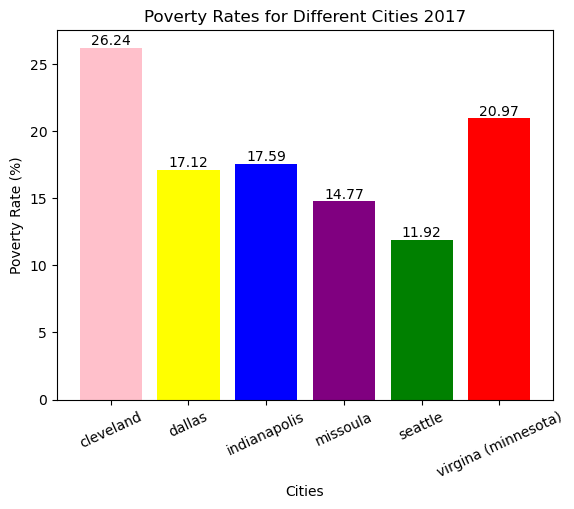

In [34]:
city=list(Complete_rounded_PR_df["City"].values[0:])
povrate=list(Complete_rounded_PR_df["Poverty Rate"].values[0:])

bar_colors = ["Pink", "yellow", "blue", "purple","green","red"]
plt.ylabel("Poverty Rate (%)")
plt.xlabel("Cities")
plt.title("Poverty Rates for Different Cities 2017")
bar1=plt.bar(city,povrate,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar1,labels=povrate,label_type="edge")
plt.show()

In [35]:
Complete_sum_df = pd.concat([cleveland_sum_df,dallas_sum_df,indianapolis_sum_df,missoula_sum_df,
                   seattle_sum_df,virginia_minnesota_sum_df])
Complete_sum_df

,Population,City
sum,853880.0,cleveland
sum,2702157.0,dallas
sum,953648.0,indianapolis
sum,96393.0,missoula
sum,954627.0,seattle
mean,9795.0,virgina (minnesota)


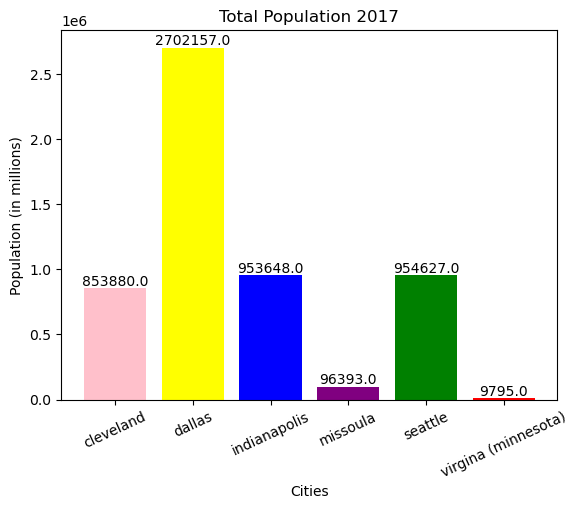

In [36]:
pop=list(Complete_sum_df["Population"].values[0:])

bar_colors = ["Pink", "yellow", "blue", "purple","green","red"]
plt.ylabel("Population (in millions)")
plt.xlabel("Cities")
plt.title("Total Population 2017")
bar2=plt.bar(city,pop,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar2,labels=pop,label_type="edge")
plt.show()

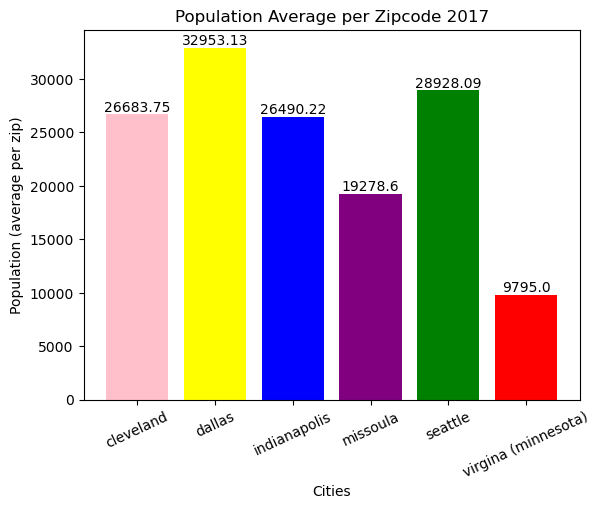

In [37]:
pop_ave=list(Complete_rounded_PR_df["Population"].values[0:])


bar_colors = ["Pink", "yellow", "blue", "purple","green","red"]
plt.ylabel("Population (average per zip)")
plt.xlabel("Cities")
plt.title("Population Average per Zipcode 2017")
bar3=plt.bar(city,pop_ave,color=bar_colors)
plt.xticks(rotation = 25)
plt.bar_label(bar3,labels=pop_ave,label_type="edge")
plt.show()